# Movie Recommendation System

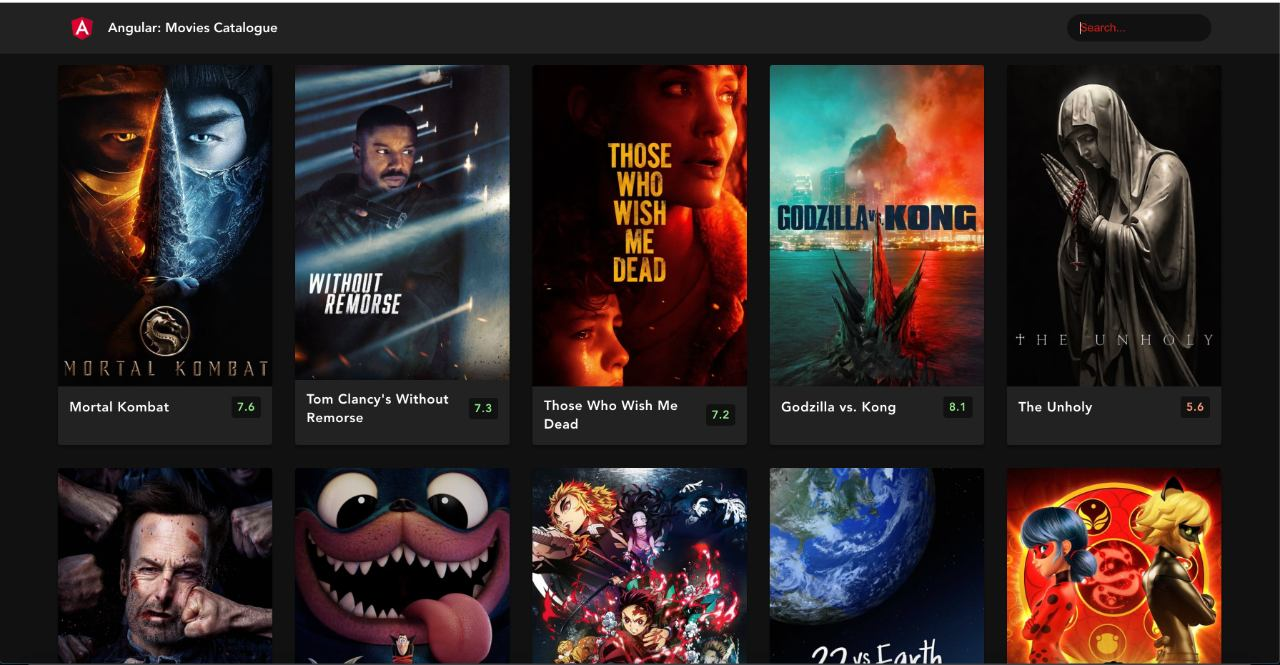

## Introduction

Movies Recommendation System is an innovative machine learning project designed to revolutionize the way audiences discover and enjoy movies. This cutting-edge recommendation system harnesses the power of advanced algorithms to analyze user preferences and deliver personalized movie suggestions.

For this project i have used TMDB-5000 dataset which is freely avaiable on kaggle, This dataset comes in two part
1. movies.csv('budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count')
2. credits.csv ( 'movie_id', 'title', 'cast', 'crew')

The first dataset has the following features:-

- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.

The second dataset has the following features:-
- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline
# to extract details from dictonaries - ast
import ast
from collections import Counter

## Importing Dataset

In [3]:
movies = pd.read_csv("movies.csv",parse_dates=['release_date'])
credits = pd.read_csv("credits.csv")

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


In [6]:
print(movies.info())
print()
print(credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [7]:
print(movies.columns)
print()
print(credits.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [8]:
# Merging Dataset on id and title

In [9]:
movies = pd.merge(movies,credits,left_on=['id','title'],right_on=['movie_id','title'])

In [10]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
movies.shape

(4803, 23)

In [12]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [13]:
movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
movie_id                4803
cast                    4761
crew                    4776
dtype: int64

## EDA

In [14]:
# extracting only name from the whole value
def func(obj):
    List = []
    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List

In [15]:
# movies.loc[1,'genres']

In [16]:
# ast.literal_eval(movies.loc[1,'genres'])

In [17]:
movies['genres'] = movies['genres'].apply(func)
movies['production_companies'] = movies['production_companies'].apply(func)
movies['production_countries'] = movies['production_countries'].apply(func)

In [18]:
movies[['genres','production_companies','production_countries']].head(10)

,genres,production_companies,production_countries
0,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]"
1,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America]
2,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]"
3,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America]
4,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],[United States of America]
5,"[Fantasy, Action, Adventure]","[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America]
6,"[Animation, Family]","[Walt Disney Pictures, Walt Disney Animation S...",[United States of America]
7,"[Action, Adventure, Science Fiction]","[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America]
8,"[Adventure, Fantasy, Family]","[Warner Bros., Heyday Films]","[United Kingdom, United States of America]"
9,"[Action, Adventure, Fantasy]","[DC Comics, Atlas Entertainment, Warner Bros.,...",[United States of America]


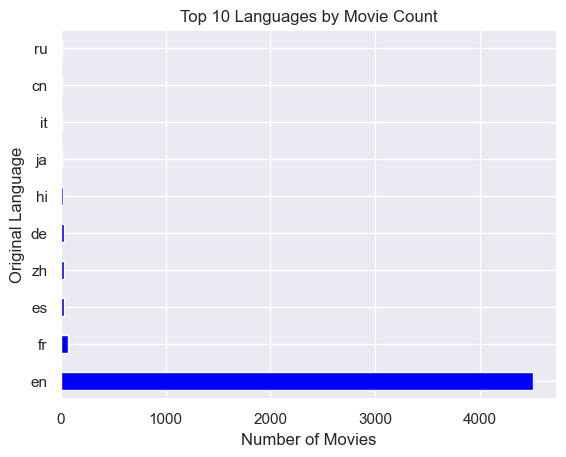

In [19]:
# Plot the top 10 languages used in movies
top_languages = movies['original_language'].value_counts().head(10)
top_languages.plot(kind='barh', color='blue')

# Set plot labels
plt.xlabel('Number of Movies')
plt.ylabel('Original Language')
plt.title('Top 10 Languages by Movie Count')

# Show the plot
plt.show()

Insight:- Almost all the movies in this dataset have english as there original language

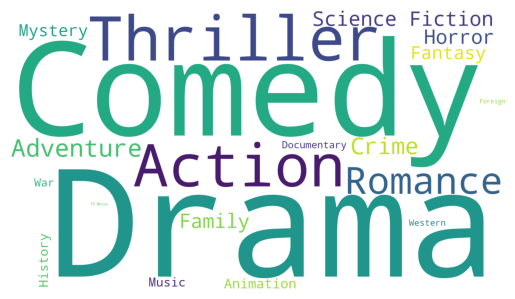

In [20]:
from wordcloud import WordCloud
all_genres = [genre for genres in movies['genres'] for genre in genres]

# Create a DataFrame and calculate value counts
genres_df = pd.DataFrame({'Genres': all_genres})
genres_counts = genres_df['Genres'].value_counts().reset_index()
#print(genres_counts)
genres_counts.rename(columns={'index':'Genres','Genres':'Frequency'} ,inplace=True)
#print(genres_counts)

# Generate and display the Word Cloud
wc = WordCloud(background_color='white', min_font_size=5, width=1600, height=900, margin=2)
plt.imshow(wc.fit_words(dict(zip(genres_counts['Genres'], genres_counts['Frequency']))))
plt.axis('off')
plt.show()

Insight-: most of the movies have Drama, Comedey and Thriller 

In [21]:
# Top production Companies
all_companies = [company for companies in movies['production_companies'] for company in companies]

# Create a DataFrame and calculate value counts
movie_prod = pd.DataFrame({'Production Company': all_companies})
movie_prod_counts = movie_prod['Production Company'].value_counts().reset_index()
movie_prod_counts.columns = ['Production Company', 'Frequency']

# Select the top 15 production companies
movie_prod_top15 = movie_prod_counts.sort_values(by='Frequency', ascending=False).head(15)

# Display the DataFrame with a background gradient
movie_prod_top15.style.background_gradient(cmap='RdBu_r')

,Production Company,Frequency
0,Warner Bros.,319
1,Universal Pictures,311
2,Paramount Pictures,285
3,Twentieth Century Fox Film Corporation,222
4,Columbia Pictures,201
5,New Line Cinema,165
6,Metro-Goldwyn-Mayer (MGM),122
7,Touchstone Pictures,118
8,Walt Disney Pictures,114
9,Relativity Media,102



Insight:- Warner Bros. has produced highest number of movies, follwed by 
Universal Pictures and Paramount Pictures.


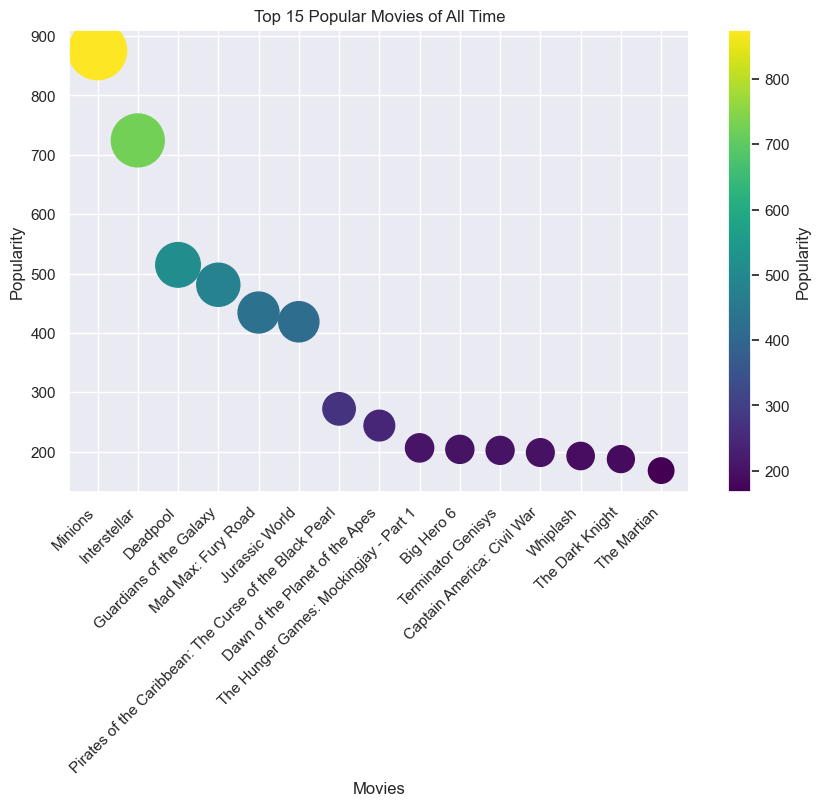

In [22]:
popular = movies[['title','popularity']]

# Sort the DataFrame by popularity in descending order and select the top 15
popular = popular.sort_values(by='popularity', ascending=False).head(15)

# Plotting the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(popular['title'], popular['popularity'],cmap='viridis', c=popular['popularity'],s=popular['popularity']*2)

# Adding labels and title
plt.title('Top 15 Popular Movies of All Time')
plt.xlabel('Movies')
plt.ylabel('Popularity')

# Display the colorbar
cbar = plt.colorbar()
cbar.set_label('Popularity')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Insight:- Minions is the most popular movie of all time

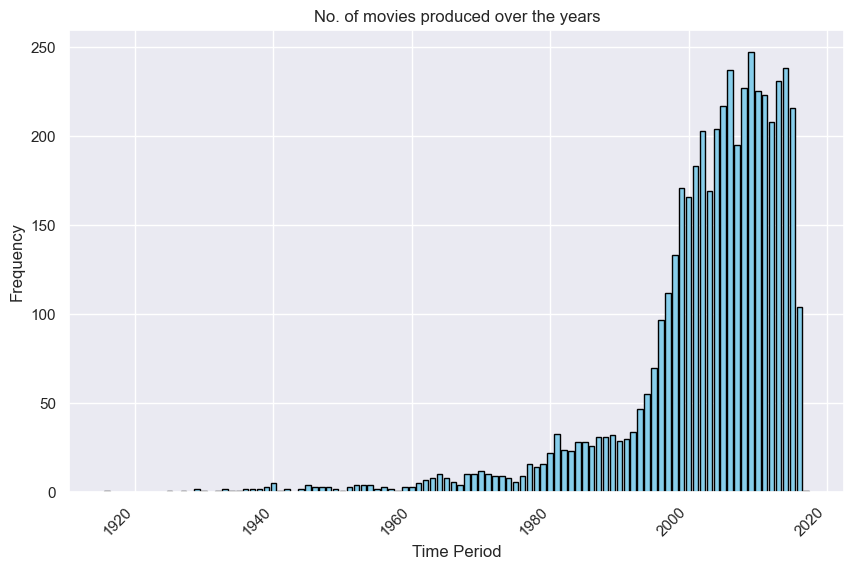

In [23]:

release_date=movies[['title','release_date']]
release_date['Year']=release_date['release_date'].dt.year
release= release_date.groupby('Year')[['title']].count() 

#print(release)

# Plotting the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(release.index,release['title'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('No. of movies produced over the years')
plt.xlabel('Time Period')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight:- Most of the movies are produced after 2000

In [24]:
# Top Production Counties
all_countries = [country for countries in movies['production_countries'] for country in countries]

# Create a DataFrame and calculate value counts
movie_prod_cont = pd.DataFrame({'Production Country': all_countries})
movie_prod_cont_counts = movie_prod_cont['Production Country'].value_counts().reset_index()
movie_prod_cont_counts.columns = ['Production Country', 'Frequency']

# Select the top 5 production countries
movie_prod_cont_top5 = movie_prod_cont_counts.sort_values(by='Frequency', ascending=False).head(5)

# Display the DataFrame with a background gradient
movie_prod_cont_top5.style.background_gradient(cmap='coolwarm')

,Production Country,Frequency
0,United States of America,3956
1,United Kingdom,636
2,Germany,324
3,France,306
4,Canada,261


Insight:- USA has produced most of the films 

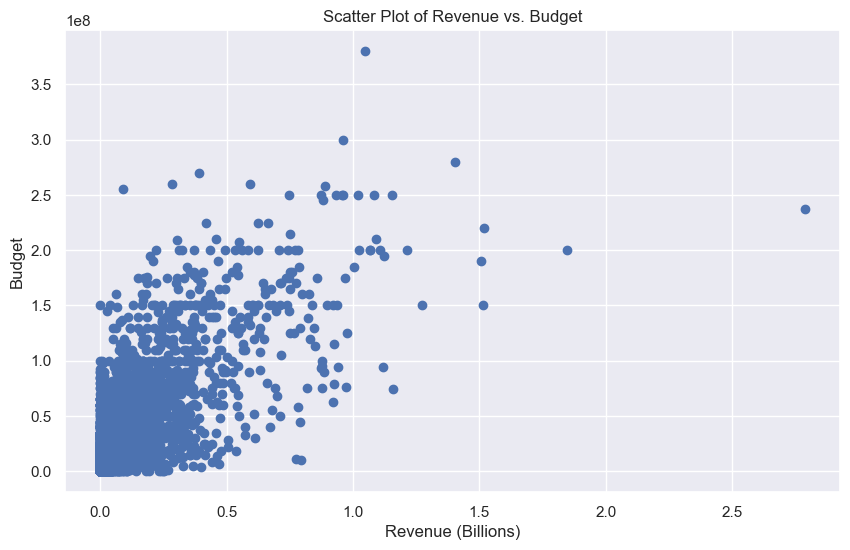

In [25]:
movies['revenue_in_billions'] = movies['revenue'] / 1e9
#1e9 is a scientific notation representing 1 billion 
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(movies['revenue_in_billions'], movies['budget'])
plt.xlabel('Revenue (Billions)')
plt.ylabel('Budget')
plt.title('Scatter Plot of Revenue vs. Budget')
plt.grid(True)
plt.show()

Insight:- There is a linear relationship between Budget and Revenue of the movie. Higher the budget, higher will be its revenue.

## Data PreProcessing

In [26]:
#Selecting only those col that are relevent in making recommendation

movies  = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   overview  4800 non-null   object
 3   genres    4803 non-null   object
 4   keywords  4803 non-null   object
 5   cast      4803 non-null   object
 6   crew      4803 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.2+ KB


In [28]:
# Checking missing data
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [29]:
movies.dropna(inplace = True)

In [30]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [31]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [32]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [33]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [34]:
movies['keywords'] = movies['keywords'].apply(convert)

In [35]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [36]:
# need only main cast name so considering only 3 cast name from each movie

In [37]:
def convert_2(text):
    lst = []
    cnt  = 0
    for i in ast.literal_eval(text):
        if cnt<3:
            lst.append(i['name'])
        cnt+=1
    return lst

In [38]:
movies['cast'] = movies['cast'].apply(convert_2)

In [39]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [40]:
# need only director name from crew

In [41]:
def fetch_director(text):
    L= []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [42]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [43]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [44]:
# removing space between words 

In [45]:
def collapse(L):
    L1 = []
  
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [46]:
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)

In [47]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [48]:
# Removing puntuations from overiview

In [49]:
import string
string.punctuation

def remove_punctuation(text):
    return "".join([i for i in text if i not in string.punctuation]) 

movies['overview']= movies['overview'].apply(remove_punctuation)
movies['overview']

0       In the 22nd century a paraplegic Marine is dis...
1       Captain Barbossa long believed to be dead has ...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a warweary former military capt...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couples honeymoon is upended by the...
4800    Signed Sealed Delivered introduces a dedicated...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4800, dtype: object

In [50]:
movies['overview'] = movies['overview'].str.split()

In [51]:
print(movies['overview'][0])

['In', 'the', '22nd', 'century', 'a', 'paraplegic', 'Marine', 'is', 'dispatched', 'to', 'the', 'moon', 'Pandora', 'on', 'a', 'unique', 'mission', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization']


In [52]:
print(movies['overview'][0])
print("********"*10)
print(movies['genres'][0])
print("********"*10)
print(movies['keywords'][0])
print("********"*10)
print(movies['cast'][0])
print("********"*10)
print(movies['crew'][0])
print("********"*10)

['In', 'the', '22nd', 'century', 'a', 'paraplegic', 'Marine', 'is', 'dispatched', 'to', 'the', 'moon', 'Pandora', 'on', 'a', 'unique', 'mission', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization']
********************************************************************************
['Action', 'Adventure', 'Fantasy', 'ScienceFiction']
********************************************************************************
['cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d']
********************************************************************************
['SamWorthington', 'ZoeSaldana', 'SigourneyWeaver']
********************************************************************************
['JamesCameron']
***********************************************

In [53]:
# make one columns basis overview, genres, keywords, cast and crew

movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [54]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century, a, paraplegic, Marine...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century, a, paraplegic, Marine..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa, long, believed, to, be, de...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa, long, believed, to, be, de..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, warweary, former, milita...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, warweary, former, milita..."


In [55]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [56]:
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century, a, paraplegic, Marine..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa, long, believed, to, be, de..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, warweary, former, milita..."


## Preprocessing of Text


In [57]:
new['tags']

0       [In, the, 22nd, century, a, paraplegic, Marine...
1       [Captain, Barbossa, long, believed, to, be, de...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, warweary, former, milita...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couples, honeymoon, is, upended,...
4800    [Signed, Sealed, Delivered, introduces, a, ded...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4800, dtype: object

In [58]:
# Stop words will be removed by model itself, Therefore skipping that step

In [59]:
#Lemitization

In [60]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(word) for word in text]
  
new['tags']=new['tags'].apply(lemmatizer)
new['tags']

0       [In, the, 22nd, century, a, paraplegic, Marine...
1       [Captain, Barbossa, long, believed, to, be, de...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, warweary, former, milita...
                              ...                        
4798    [El, Mariachi, just, want, to, play, his, guit...
4799    [A, newlywed, couple, honeymoon, is, upended, ...
4800    [Signed, Sealed, Delivered, introduces, a, ded...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4800, dtype: object

In [61]:
# Converting list to string
new['tags'] = new['tags'].str.join(" ")
new['tags']

0       In the 22nd century a paraplegic Marine is dis...
1       Captain Barbossa long believed to be dead ha c...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a warweary former military capt...
                              ...                        
4798    El Mariachi just want to play his guitar and c...
4799    A newlywed couple honeymoon is upended by the ...
4800    Signed Sealed Delivered introduces a dedicated...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: tags, Length: 4800, dtype: object

In [62]:
# Lowering the text 

In [63]:
#This is performed to ensure that the model does 
#not distinguish between the same word written in different cases.
new['tags'] = new['tags'].str.lower()
new['tags']


0       in the 22nd century a paraplegic marine is dis...
1       captain barbossa long believed to be dead ha c...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a warweary former military capt...
                              ...                        
4798    el mariachi just want to play his guitar and c...
4799    a newlywed couple honeymoon is upended by the ...
4800    signed sealed delivered introduces a dedicated...
4801    when ambitious new york attorney sam is sent t...
4802    ever since the second grade when he first saw ...
Name: tags, Length: 4800, dtype: object

## Feature Extraction

### BAG OF WORDS

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()
#print(vector[0])
vector.shape

(4800, 35854)

### Similiarity Matrix

In [92]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.06933752, 0.06933752, ..., 0.03696106, 0.02083333,
        0.        ],
       [0.06933752, 1.        , 0.05128205, ..., 0.04100462, 0.        ,
        0.02102586],
       [0.06933752, 0.05128205, 1.        , ..., 0.04100462, 0.        ,
        0.        ],
       ...,
       [0.03696106, 0.04100462, 0.04100462, ..., 1.        , 0.03696106,
        0.01681207],
       [0.02083333, 0.        , 0.        , ..., 0.03696106, 1.        ,
        0.01895245],
       [0.        , 0.02102586, 0.        , ..., 0.01681207, 0.01895245,
        1.        ]])

In [66]:
new.tail(10)

,movie_id,title,tags
4793,182291,On The Downlow,isaac and angel are two young latinos involved...
4794,286939,Sanctuary: Quite a Conundrum,it should have been just a normal day of sex f...
4795,124606,Bang,a young woman in la is having a bad day shes e...
4796,14337,Primer,friendsfledgling entrepreneur invent a device ...
4797,67238,Cavite,adam a security guard travel from california t...
4798,9367,El Mariachi,el mariachi just want to play his guitar and c...
4799,72766,Newlyweds,a newlywed couple honeymoon is upended by the ...
4800,231617,"Signed, Sealed, Delivered",signed sealed delivered introduces a dedicated...
4801,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...
4802,25975,My Date with Drew,ever since the second grade when he first saw ...


In [67]:
new[new['title']=='Bang'].index[0]

4795

## Recommendation System(BOW)

In [84]:
def recommend(movie):
    index = new[new['title']==movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
    
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [85]:
index = new[new['title']=='Spider-Man 3'].index[0]
sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])

[(5, 1.0000000000000002),
 (30, 0.22118842035851385),
 (159, 0.1530820395723348),
 (38, 0.09640587908797309),
 (20, 0.085409800864297),
 (813, 0.04901004592729793),
 (215, 0.045969537487552475),
 (7, 0.041026730618437),
 (26, 0.03978760102066258),
 (10, 0.0386253099827571),
 (788, 0.038107114407178844),
 (1534, 0.03726544126120872),
 (784, 0.03722805807434053),
 (1359, 0.035605772737364476),
 (2029, 0.03533854646112974),
 (4083, 0.03501302018757377),
 (2874, 0.033216477687642465),
 (115, 0.033183481403437964),
 (1652, 0.032858599369102334),
 (2755, 0.03283230671580059),
 (4661, 0.0326288387451657),
 (1, 0.031138597891411726),
 (1213, 0.03012856376359345),
 (232, 0.02993780404319828),
 (413, 0.029802142883728157),
 (870, 0.029785128288127093),
 (1296, 0.029448712436314278),
 (2433, 0.029210664641263394),
 (3373, 0.028066354523242784),
 (971, 0.02749307950483786),
 (1318, 0.027303342314076315),
 (1637, 0.02727376797406517),
 (339, 0.0271301001563107),
 (2039, 0.02648335232697249),
 (3762

In [86]:
recommend('Spider-Man 3')

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Superman


In [87]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
Water
A Passage to India
Wah-Wah


In [88]:
recommend('Harry Potter and the Chamber of Secrets')

Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Philosopher's Stone
Harry Potter and the Half-Blood Prince


In [89]:
recommend('Avengers: Age of Ultron')

The Avengers
Captain America: Civil War
Iron Man 2
Iron Man
Captain America: The Winter Soldier


### TF/IDF

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
vector = tfidf.fit_transform(new['tags'])
vector.shape


(4800, 204328)

## Similiarity Matrix

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.01081533, 0.01051518, ..., 0.00510186, 0.00138966,
        0.        ],
       [0.01081533, 1.        , 0.00317463, ..., 0.00573934, 0.        ,
        0.00151554],
       [0.01051518, 0.00317463, 1.        , ..., 0.00550799, 0.        ,
        0.        ],
       ...,
       [0.00510186, 0.00573934, 0.00550799, ..., 1.        , 0.00421244,
        0.00516694],
       [0.00138966, 0.        , 0.        , ..., 0.00421244, 1.        ,
        0.00158998],
       [0.        , 0.00151554, 0.        , ..., 0.00516694, 0.00158998,
        1.        ]])

In [76]:
new[new['title']=='Bang'].index[0]

4795

## Recommendation System(TF-IDF)

In [77]:
def recommend(movie):
    index = new[new['title']==movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
    
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [78]:
recommend('Spider-Man 3')

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Superman


In [79]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
Water
A Passage to India
Wah-Wah


In [80]:
recommend('Harry Potter and the Chamber of Secrets')

Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Philosopher's Stone
Harry Potter and the Half-Blood Prince


In [81]:
recommend('Avengers: Age of Ultron')

The Avengers
Captain America: Civil War
Iron Man 2
Iron Man
Captain America: The Winter Soldier


In [82]:
recommend('Tangled')

The Princess and the Frog
Of Horses and Men
Into the Woods
Horse Camp
Man on Wire


## Model Save


In [94]:
import pickle
pickle.dump(new.to_dict(), open('movie_dict.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))